WeatherPy

Analysis

As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.


Note

Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = 'Job6/output_data/cities.csv'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

Perform API Calls

Perform a weather check on each city using a series of successive API calls.
Include a print log of each city as it'sbeing processed (with the city number and city name).

In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [4]:
# Create  lists to append the API data 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

record = 1

print(f"Beginning Data Retrieval")
print(f"-------------------------------")

for city in cities:  
    
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        record= record + 1
        
        time.sleep(1.01)

# Skip the missing data
        
    except:
        print("City not found...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | East London
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=east london
Processing Record 2 | Talnakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=talnakh
Processing Record 3 | Punta Arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=punta arenas
Processing Record 4 | Gavle
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=gavle
Processing Record 5 | Castro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=castro
Processing Record 6 | Otjiwarongo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=otjiwarongo
Processing Record 7 | Saqqez
http://api.openweathermap.org/data/2.5/weather?u

City not found...
Processing Record 57 | Nuuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=nuuk
Processing Record 58 | Kota Belud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=kota belud
Processing Record 59 | Myitkyina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=myitkyina
Processing Record 60 | Nukus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=nukus
Processing Record 61 | Diego de Almagro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=diego de almagro
Processing Record 62 | Beboto
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=beboto
Processing Record 63 | Tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a

Processing Record 112 | Khatanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=khatanga
Processing Record 113 | Hobyo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=hobyo
Processing Record 114 | Kieta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=kieta
Processing Record 115 | Nabire
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=nabire
Processing Record 116 | Nuevo Progreso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=nuevo progreso
Processing Record 117 | Waipawa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=waipawa
City not found...
Processing Record 118 | Altamira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431

Processing Record 168 | Alta Floresta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=alta floresta
Processing Record 169 | Sao Felix do Xingu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=sao felix do xingu
Processing Record 170 | Yulara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=yulara
Processing Record 171 | Katsuura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=katsuura
Processing Record 172 | Lagoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=lagoa
Processing Record 173 | Avarua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=avarua
City not found...
Processing Record 174 | Yuxia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPI

Processing Record 224 | Kavaratti
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=kavaratti
Processing Record 225 | Baruun-Urt
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=baruun-urt
Processing Record 226 | Naron
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=naron
Processing Record 227 | Oktyabrskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=oktyabrskoye
Processing Record 228 | Seoul
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=seoul
Processing Record 229 | Port-Gentil
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=port-gentil
Processing Record 230 | Presidente Dutra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a23

City not found...
Processing Record 280 | Kyle
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=kyle
Processing Record 281 | Bagdarin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=bagdarin
Processing Record 282 | Vao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=vao
Processing Record 283 | Athens
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=athens
Processing Record 284 | Suzun
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=suzun
Processing Record 285 | Skibbereen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=skibbereen
Processing Record 286 | Annau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=ann

Processing Record 336 | Komsomolskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=komsomolskiy
Processing Record 337 | Lazaro Cardenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=lazaro cardenas
Processing Record 338 | Yamasaki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=yamasaki
Processing Record 339 | Betare Oya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=betare oya
Processing Record 340 | Kutum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=kutum
Processing Record 341 | Nyurba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=nyurba
Processing Record 342 | Urbano Santos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d8239

Processing Record 392 | Graham
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=graham
Processing Record 393 | Maltahohe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=maltahohe
Processing Record 394 | Outlook
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=outlook
City not found...
Processing Record 395 | Kletskaya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=kletskaya
City not found...
Processing Record 396 | Christchurch
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=christchurch
Processing Record 397 | Airai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=airai
Processing Record 398 | Sikonge
http://api.openweathermap.org/data/2.5/weather?units=Imperial&

Processing Record 448 | Nova Olinda do Norte
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=nova olinda do norte
Processing Record 449 | Cairns
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=cairns
Processing Record 450 | Redlands
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=redlands
Processing Record 451 | Sola
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=sola
Processing Record 452 | Kulhudhuffushi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=kulhudhuffushi
Processing Record 453 | Les Cayes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=les cayes
Processing Record 454 | Dicamay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d

City not found...
Processing Record 503 | Danville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=danville
Processing Record 504 | Egvekinot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=egvekinot
Processing Record 505 | Tautira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=tautira
Processing Record 506 | Vinh Long
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=vinh long
Processing Record 507 | Valparaiso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=valparaiso
Processing Record 508 | Itamaraju
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e23d823912a231431b3f2dcddedef98a&q=itamaraju
Processing Record 509 | Farafangana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=

Convert Raw Data to DataFrame

Export the city data into a .csv.
Display the DataFrame

In [5]:
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Data frame of the weather data
weather_data = pd.DataFrame(weatherpy_dict)

weather_data.count()

City          532
Cloudiness    532
Country       532
Date          532
Humidity      532
Lat           532
Lng           532
Max Temp      532
Wind Speed    532
dtype: int64

In [6]:
#Directori could be specify or not
weather_data.to_csv('weather_data.csv')

weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,East London,20,ZA,1554080612,100,-33.02,27.91,72.53,5.19
1,Talnakh,92,RU,1554080613,90,69.49,88.39,28.70,14.81
2,Punta Arenas,75,CL,1554080546,76,-53.16,-70.91,51.80,13.87
3,Gavle,0,SE,1554080254,61,60.67,17.14,28.99,1.99
4,Castro,90,CL,1554076800,100,-42.48,-73.76,53.60,4.70


 Plotting the Data

Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
Save the plotted figures as .pngs.

 Latitude vs. Temperature Plot

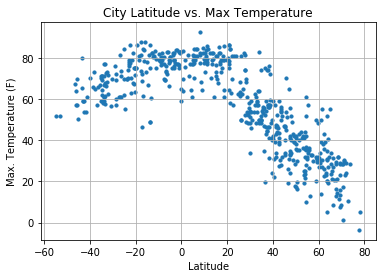

In [7]:
# Scatter plot 
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

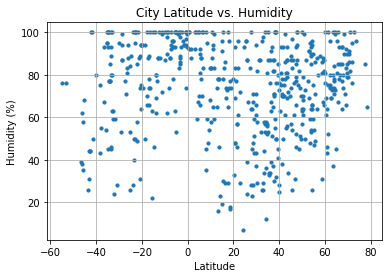

In [8]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Humidity_vs_Latitude.png")

plt.show()

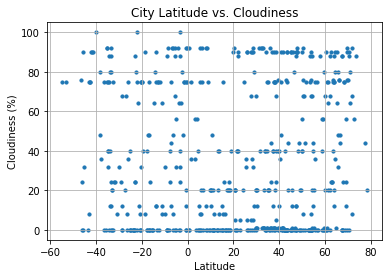

In [9]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Cloudinesss_vs_Latitude.png")

plt.show()

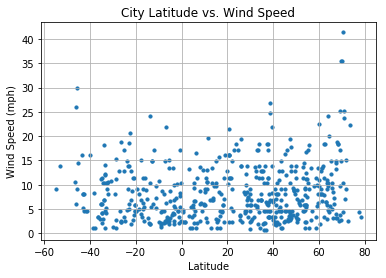

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()